# Exercise: applying differential privacy by means of Python-DP library 
## Safety, Privacy and Legal Aspects - Master in Data Science (2022/2023)
### Name: .Johana Cómbita Niño...

In [1]:
# Install PyDP
#pip install python-dp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pydp as dp
from pydp.algorithms.laplacian import BoundedSum, Count, BoundedMean, Max, Min


#### Download and read the widely known Stroke Prediction Dataset  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. Remove NaN values and answer the following questions:

In [2]:
#Cargando el dataset
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Se revisa la composición del dataset, para conocer columnas, tipo de dato por columna y cantidad de valores. Aca se puede ver si hay valores nulos y cuantos son.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Se identifica que solo la columna BMI tiene valores nulos. Se pueden filtrar para validar y finalmente se eliminan.

In [4]:
#Se pueden filtrar filas con NaN, que en este caso son 201 solo en BMI como se habia indicado
df_con_nan = dataset[dataset.isna().any(axis=1)]  
df_con_nan

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [5]:
#Eliminando valores NaN
dataset = dataset.dropna()
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
# verificando valores nulos
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### 1. Calculate using differential privacy (DP) for an epsilon value of your choice, how many women have suffered a stroke. And considering women aged 60 years and older? Repeat the same for men.

#### In both cases, compare the results with those obtained if DP is not applied.

Primero hay que construir los conjuntos de datos a analizar. Por un lado, están las mujeres y mujeres mayores de 60 años, y por el otro los hombres y hombres mayores de 60 años.

In [7]:
# Mujeres
women = dataset[(dataset["gender"] == "Female")]

#Mujeres y edad >= 60
women_60 = dataset[(dataset["gender"] == "Female") & (dataset["age"] >= 60)]

# Hombres
men = dataset[(dataset["gender"] == "Male")]

# hombres y edad >= 60
men_60 = dataset[(dataset["gender"] == "Male") & (dataset["age"] >= 60)]

In [8]:
women

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


Para calcular las mujeres y hombres que han sufrido ictus a nivel general y considerando que sean mayor que 60 años utilizando la privacidad diferencial, es necesario primero definir un valor de epsilon, el cual controla el nivel de privacidad. Es importante mencionar que los valores bajos de epsilon generan más ruido, es decir dan una mayor seguridad.

In [12]:
epsilon = 0.5 
dp = BoundedSum(epsilon=epsilon)

# Aplicar la suma con DP
results_women = dp.quick_result(women["stroke"].values)
results_women_60 = dp.quick_result(women_60["stroke"].values)
results_men = dp.quick_result(men["stroke"].values)
results_men_60 = dp.quick_result(men_60["stroke"].values)

# Mostrar resultados
print(f"Total de mujeres con stroke: {results_women}")
print(f"Total de mujeres con stroke y edad >= 60: {results_women_60}")
print(f"Total de hombres con stroke: {results_men}")
print(f"Total de hombres con stroke y edad >= 60: {results_men_60}")

Total de mujeres con stroke: 118
Total de mujeres con stroke y edad >= 60: 84
Total de hombres con stroke: 87
Total de hombres con stroke y edad >= 60: 69


Luego se calcula el valor real o sin privacidad diferencial para cada una de las poblaciones antes mencionadas.

In [13]:
# Conteos exactos sin privacidad diferencial para comparar
real_results_w = women["stroke"].sum()
real_results_w_60 = women_60["stroke"].sum()
real_results_m = men["stroke"].sum()
real_results_m_60 = men_60["stroke"].sum()

print(f"Total de mujeres con stroke: {real_results_w}")
print(f"Total de mujeres con stroke y edad >= 60: {real_results_w_60}")
print(f"Total de hombres con stroke: {real_results_m}")
print(f"Total de hombres con stroke y edad >= 60: {real_results_m_60}")

Total de mujeres con stroke: 120
Total de mujeres con stroke y edad >= 60: 84
Total de hombres con stroke: 89
Total de hombres con stroke y edad >= 60: 66


A continuación, se presentan los resultados con y sin privacidad diferencial:

In [14]:
# resultados

result_1 = pd.DataFrame({
    "Grupo": ["Total Mujeres con Ictus", " Total Mujeres >= 60 con Ictus", "Total Hombres con Ictus", "Total Hombres >= 60 con Ictus"],
    "Sin DP": [real_results_w, real_results_w_60, real_results_m, real_results_m_60],
    "Con DP": [results_women, results_women_60, results_men, results_men_60]
})

result_1

,Grupo,Sin DP,Con DP
0,Total Mujeres con Ictus,120,118
1,Total Mujeres >= 60 con Ictus,84,84
2,Total Hombres con Ictus,89,87
3,Total Hombres >= 60 con Ictus,66,69


Los resultados muestran que al utilizar la privacidad diferencial con un epsilon de 0.5 el conteo de mujeres y hombres que han sufrido ictus y considerando que sean mayores que 60 años es muy cercano a los valores reales, por lo cual se podría decir que este valor de epsilon permite un balance entre privacidad y precisión. Es importante mencionar que los resultados no son siempre los mismos porque la privacidad diferencial agrega un ruido aleatorio a los resultados asegurando que la presencia o ausencia de un individuo no afecte significativamente la salida. Esto asegura proteger la privacidad de los individuos. 

#### 2. For all women who have suffered a stroke, calculate the mean BMI applying PD for a certain epsilon value.  Repeat the same for those who have not suffered a stroke. 

#### Compare the results with those obtained if DP is not applied.

Primero se crean los grupos de mujeres que han sufrido ictus y las sanas para calcular el promedio del IMC con y sin PD.

In [15]:
# Mujeres con stroke
women_stroke = dataset[(dataset["gender"] == "Female") & (dataset["stroke"] == 1)]

#Mujeres sin stroke
women_healthy = dataset[(dataset["gender"] == "Female") & (dataset["stroke"] == 0)]


In [16]:
women_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,1836,Female,51.0,1,0,Yes,Private,Urban,88.20,28.4,never smoked,1
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


En este caso como se esta calculando un promedio y los resultados pueden ser variados, es importante establecer unos límites para que los resultados no se vean afectados, debido a que la DP agrega ruido basado en este rango de valores posibles, evitando una distorsion de los datos. En este sentido, se dibuja una distribución de los datos de BMI de las mujeres para identificar el rango. 

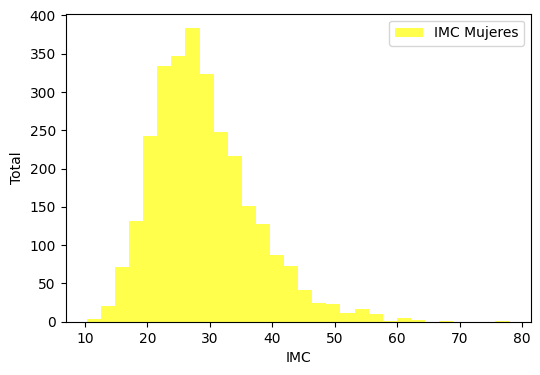

In [17]:
#distribución de BMI de mujeres
plt.figure(figsize=(6, 4))
plt.hist(women["bmi"], bins=30, color='yellow', alpha=0.7, label='IMC Mujeres')
plt.xlabel('IMC')
plt.ylabel('Total')
plt.legend()
plt.show()

Se calcula el valor medio utilizando privacidad diferencial con un valor de epsilon de 0.5 y un rango entre 10 y 80.

In [18]:
epsilon = 0.5
dp = BoundedMean(epsilon=epsilon, lower_bound=10, upper_bound=80) 

# Aplicar promedio con DP
results_women_stroke = dp.quick_result(women_stroke["bmi"].astype(int).values) 
results_women_health = dp.quick_result(women_healthy["bmi"].astype(int).values)

#Resultados
print(f"Promedio de bmi de mujeres con stroke: {results_women_stroke}")
print(f"Promedio de bmi de mujeres sin stroke: {results_women_health}")

Promedio de bmi de mujeres con stroke: 31.16528925619835
Promedio de bmi de mujeres sin stroke: 28.547353258912494


Luego se calcula el valor real o sin privacidad diferencial para cada una de las poblaciones antes mencionadas.

In [19]:
# Conteos exactos sin privacidad diferencial para comparar
real_result_w_s = women_stroke["bmi"].mean()
real_result_w_h = women_healthy["bmi"].mean()

print(f"Promedio de bmi de mujeres con stroke: {real_result_w_s}")
print(f"Promedio de bmi de mujeres sin stroke: {real_result_w_h}")

Promedio de bmi de mujeres con stroke: 30.21833333333333
Promedio de bmi de mujeres sin stroke: 29.015952466690674


A continuación, se presentan los resultados con y sin privacidad diferencial:

In [20]:
# resultados
result_2 = pd.DataFrame({
    "Grupo": ["Promedio IMC Mujeres con Ictus", "Promedio de IMC Mujeres sin Ictus"],
    "Sin DP": [real_result_w_s, real_result_w_h],
    "Con DP": [results_women_stroke, results_women_health]
})

result_2

,Grupo,Sin DP,Con DP
0,Promedio IMC Mujeres con Ictus,30.218333,31.165289
1,Promedio de IMC Mujeres sin Ictus,29.015952,28.547353


Los resultados muestran que al utilizar DP con epsilon de 0.5 el promedio del IMC en mujeres que han sufrido Ictus y las sanas es muy cercano al valor real, lo cual se debe al ruido introducido para asegurar la privacidad. De igual forma al punto anterior, se observa que este valor de epsilon permite obtener un resultado que garantiza un balance entre privacidad y precisión. Con estos resultados con DP se puede proteger la privacidad de los individuos y brindar este tipo de información de manera segura. 

#### 3. For all the people who have suffered a stroke, calculate (by applying PD) how many of them suffered from hypertension.  Repeat the same for those who have not suffered a stroke. 

#### Compare the results with those obtained if DP is not applied.

Primero se identifican las dos poblaciones, que son las personas que han sufrido ictus y las que no.

In [21]:
#Personas con stroke 
stroke = dataset[(dataset["stroke"] == 1)]

#personas sin stroke
healthy = dataset[(dataset["stroke"] == 0)]

stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


Se calcula el número de personas con hipertensión que padecieron ictus y las que no, partiendo de un epsilon de 0.5.

In [22]:
epsilon = 0.5 
dp = BoundedSum(epsilon=epsilon)

# personas con hipertencion con DP
result_h_stroke = dp.quick_result(stroke["hypertension"].values)
result_h_healthy = dp.quick_result(healthy["hypertension"].values)

# Mostrar resultados
print(f"Total personas hipertensas con stroke: {result_h_stroke}")
print(f"Total personas hipertensas sin stroke: {result_h_healthy}")

Total personas hipertensas con stroke: 68
Total personas hipertensas sin stroke: 394


Luego se calcula el valor sin privacidad diferencial para cada una de las poblaciones antes mencionadas.

In [23]:
#conteo real sin DP
real_h_stroke = stroke["hypertension"].sum()
real_h_healthy = healthy["hypertension"].sum()

print(f"Total personas hipertensas con stroke: {real_h_stroke}")
print(f"Total personas hipertensas sin stroke: {real_h_healthy}")

Total personas hipertensas con stroke: 60
Total personas hipertensas sin stroke: 391


A continuación, se presentan los resultados con y sin privacidad diferencial:

In [24]:
# Comparación de resultados
result_3 = pd.DataFrame({
    "Grupo": ["Total personas hipertensas con Ictus", "Total personas hipertensas sin Ictus"],
    "Sin DP": [real_h_stroke, real_h_healthy],
    "Con DP": [result_h_stroke, result_h_healthy]
})

result_3

,Grupo,Sin DP,Con DP
0,Total personas hipertensas con Ictus,60,68
1,Total personas hipertensas sin Ictus,391,394


Al igual que los puntos anteriores se observa que el número de personas que ha sufrido ictus y sanas que padecían hipertensión es similar al aplicar un DP con epsilon de 0.5, garantizando la seguridad en la información.

#### 4. Calculate the avgerage glucose level of all the people who have suffered a stroke. Compare this result graphically with that obtained by applying DP as a function of the epsilon value introduced (e.g., you can test what happens even with epsilon values higher than 1, epsilon = [0.1, 0.2, 0.3,...,10]). 

#### What property of differential privacy and the privacy budget (epsilon) do you see reflected in this case?

Primero se calcula el promedio de glucosa sin privacidad diferencial para las personas con Ictus:

In [25]:
# promedio de nivel de glucosa de personas que han tenido un ictus
real_glucose = stroke["avg_glucose_level"].mean()

print(f"Promedio de nivel de glucosa de personas con ictus: {real_glucose}")

Promedio de nivel de glucosa de personas con ictus: 134.5713875598086


En este caso también se está calculando un promedio y los resultados pueden ser variados, por lo cual es importante establecer unos límites para que los resultados no se vean afectados. En este sentido, se dibuja una distribución de los datos de glucosa de personas con Ictus para identificar el rango. 

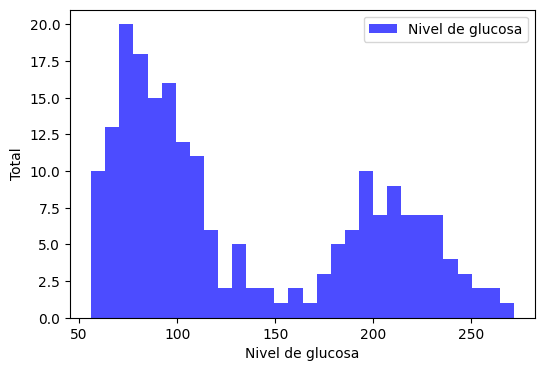

In [26]:
#distribución de glucosa de personas con ictus
plt.figure(figsize=(6, 4))
plt.hist(stroke["avg_glucose_level"], bins=30, color='blue', alpha=0.7, label='Nivel de glucosa')
plt.xlabel('Nivel de glucosa')
plt.ylabel('Total')
plt.legend()
plt.show()

Se calcula el promedio del nivel de glucosa con privacidad diferencial aplicando diferentes valores de epsilon y un rango entre 50 y 300.

In [27]:
epsilon = np.linspace(0.1, 10, 100) 

glucose_results = []

for e in epsilon:
    dp = BoundedMean(epsilon=e, lower_bound=50, upper_bound=300)
    result = dp.quick_result(stroke["avg_glucose_level"].astype(int).values)
    glucose_results.append(result)


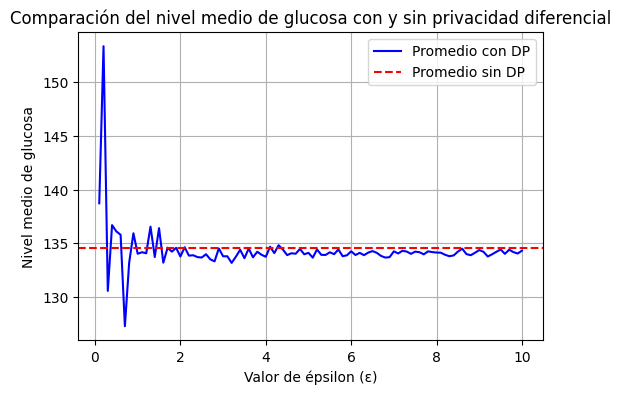

In [28]:
# Grafica de los resultados
plt.figure(figsize=(6, 4))
plt.plot(epsilon, glucose_results, label="Promedio con DP", color='blue')
plt.axhline(real_glucose, color='red', linestyle='--', label="Promedio sin DP")
plt.title("Comparación del nivel medio de glucosa con y sin privacidad diferencial")
plt.xlabel("Valor de épsilon (ε)")
plt.ylabel("Nivel medio de glucosa")
plt.legend()
plt.grid(True)
plt.show()

Los resultados de la gráfica muestran que a medida que el epsilon aumenta el cálculo del promedio de la glucosa en personas con Ictus se va acercando y pareciendo más al valor real de ese promedio (sin DP), es decir se pierde privacidad. Cuando el epsilon crece la cantidad de ruido añadido a los datos disminuye, dando como resultado estimaciones más precisas (cercanas a la real) pero menos privadas. Por consiguiente, en la gráfica se observa que valores bajos de epsilon representan una mayor privacidad de los datos, por lo cual hay una mayor distorsión (ruido), sacrificando precisión. Esto mismo era lo que se observaba como resultado en los puntos anteriores, donde se evidencia que un valor de 0.5 puede ser oportuno.

#### 5. Compare by means of bar charts the total number of people who have suffered a stroke according to the age range grouped in intervals of 20 years. Compare in each case the result obtained without applying differential privacy and the one obtained by applying DP for a pre-fixed epsilon value.

Como primer paso se definen los grupos por rango de edades agregando una nueva columna llamada "age_group" para clasificar. Luego se hace el conteo por grupos para tener la información de la cantidad de personas que han sufrido un Ictus por rango de edades sin DP.

In [29]:
# Definir los intervalos de edad
bins = [0, 20, 40, 60, 80, 100]  # Definiendo rangos
labels = ["0-19", "20-39", "40-59", "60-79", "80+"]

# Crear una nueva columna con los grupos de edad
dataset["age_group"] = pd.cut(dataset["age"], bins=bins, labels=labels, right=False)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-79
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80+
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-59
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-79
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,0-19
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,80+
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,20-39
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,40-59


In [30]:
# Contar el número de personas con ictus en cada grupo SIN DP
stroke_counts_real = dataset.groupby("age_group")["stroke"].sum()
stroke_counts_real

age_group
0-19       1
20-39      5
40-59     53
60-79    111
80+       39
Name: stroke, dtype: int64

Luego se calcula este valor de cantidad de personas con DP partiendo de un epsilon de 0.5 para preservar la precisión y garantizar una privacidad. En el bucle se hace el cálculo por grupo, donde es necesario establecer un ajuste para evitar valores negativos debido a que estos no serían coherentes en el contexto del análisis. El ajuste consiste manejar un mínimo basado en los datos del grupo para evitar introducir sesgos ni forzar al modelo a un determinado número como 0 siempre que sea negativo. Esto sucede debido a que los rangos de 0 - 19 y 20 - 39 tienen valores bastante bajos, al agregar el ruido es posible que se generen valores negativos debido a que las estimaciones depende del ruido que sigue una determinada distribución. 

Este ajuste es una forma de evitar que el modelo devuelva valores irrealistas, por lo cual se usa un factor de 0.5 de los datos reales por grupo y 1. Estos son valores un poco arbitrarios pero que ayudan a garantizar un mínimo razonable de personas en los grupos pequeños. 

In [35]:
epsilon = 0.5
dp = BoundedSum(epsilon=epsilon)
age_results_dp = []

for group in labels:
    real_value = stroke_counts_real[group]
    result = dp.quick_result(dataset[dataset["age_group"] == group]["stroke"].values)
    # Ajustar valores negativos usando el mínimo entre 50% del real y 1 caso
    if result < 0:
        result = int(max(real_value * 0.5, 1))
    
    age_results_dp.append(result)

age_results_dp

[1, 2, 61, 111, 35]

Luego se comparan los resultados para cada grupo de edades.

In [36]:
# Comparación de resultados
result_5 = pd.DataFrame({
    "Grupo de edad": labels,
    "Sin DP": stroke_counts_real,
    "Con DP": age_results_dp
})

result_5

,Grupo de edad,Sin DP,Con DP
age_group,,,
0-19,0-19,1,1
20-39,20-39,5,2
40-59,40-59,53,61
60-79,60-79,111,111
80+,80+,39,35


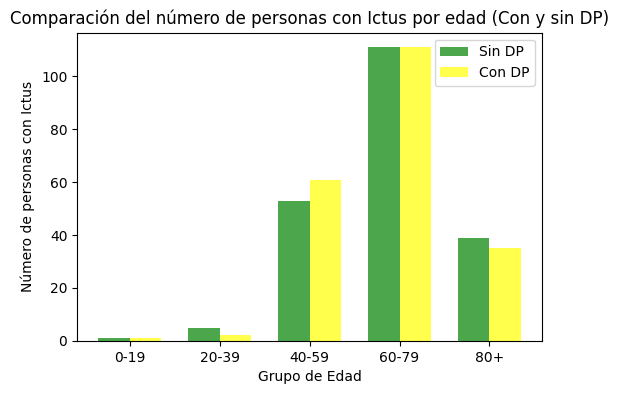

In [37]:
# Grafica
x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x - width/2, result_5["Sin DP"], width, label="Sin DP", color="green", alpha=0.7)
ax.bar(x + width/2, result_5["Con DP"], width, label="Con DP", color="yellow", alpha=0.7)

# Etiquetas y leyenda
ax.set_xlabel("Grupo de Edad")
ax.set_ylabel("Número de personas con Ictus")
ax.set_title("Comparación del número de personas con Ictus por edad (Con y sin DP)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Los resultados muestran que con un valor de épsilon de 0.5, los valores obtenidos con privacidad diferencial están bastante cerca de los valores reales, lo que garantiza tanto la privacidad como la precisión de los datos. Sin embargo, es importante señalar que en los grupos con un número bajo de individuos (como los de 0-19 y 20-39 años), la adición de ruido puede provocar diferencias más significativas. Esto ocurre porque, en estos grupos, el impacto del ruido agregado es más grande, lo que puede generar valores distorsionados que se alejan de los valores reales.